In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Introduction

We are testing the randomness of the stack pointer in an ELF file

In [2]:
addresses = []
addresses_bytes = []

with open('rsp_rnd.log', 'r') as f:
    for address_value in f:
        addresses.append(int(address_value, 16))
        value = address_value.replace('0x', '').replace('\n', '')
        addresses_bytes.append([int(_, 16) for _ in (value[-2:], value[-4:-2], value[-6:-4], value[:-6])])

s_addresses = stats.describe(addresses)

In [3]:
first_byte_statistics  = [_[0] for _ in addresses_bytes]
second_byte_statistics = [_[1] for _ in addresses_bytes]
third_byte_statistics  = [_[2] for _ in addresses_bytes]
fourth_byte_statistics = [_[3] for _ in addresses_bytes]

print(s_addresses)
print(stats.describe(first_byte_statistics))
n_total = len(addresses)
min, max = s_addresses.minmax
print("# addresses: %d" % n_total)
print("max: 0x%08x min: 0x%08x" % (max, min))
print("delta: %x" % (max - min))
print("delta: %x" % ((max - min) >> 12))

DescribeResult(nobs=15184852, minmax=(4286555040, 4294953968), mean=4290755616.867121, variance=5866256680718.409, skewness=-7.78734814298478e-05, kurtosis=-1.2003548301655678)
DescribeResult(nobs=15184852, minmax=(0, 240), mean=119.99774301389306, variance=5439.430016313532, skewness=-0.00014000867759740704, kurtosis=-1.2090314769565125)
# addresses: 15184852
max: 0xffffcbf0 min: 0xff7fa3a0
delta: 802850
delta: 802


In [4]:
# example from here <http://matplotlib.org/examples/pylab_examples/major_minor_demo1.html>
def plot_statistics(data):
    plt.figure(figsize=(20,6))
    s = stats.describe(data)

    min = s.minmax[0]
    max = s.minmax[1]
    delta = max - min

    fig, ax = plt.subplots()

    #if delta != 0:
    plt.xticks(np.arange(0, 0xff, 0x10), rotation='vertical')
    plt.xlim(0, 0xff + 1)
    plt.hist(data, bins=0xff, density=True)
    plt.plot()

    #if delta != 0:
    # print out hex values for the ticks
    majorFormatter = FormatStrFormatter('%02x')
    ax.xaxis.set_major_formatter(majorFormatter)

    plt.show()
    print('#: %d min: 0x%08x max: 0x%08x delta: 0x%08x' % (len(addresses), min, max, delta))



/usr/lib/python3/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


bins=7415


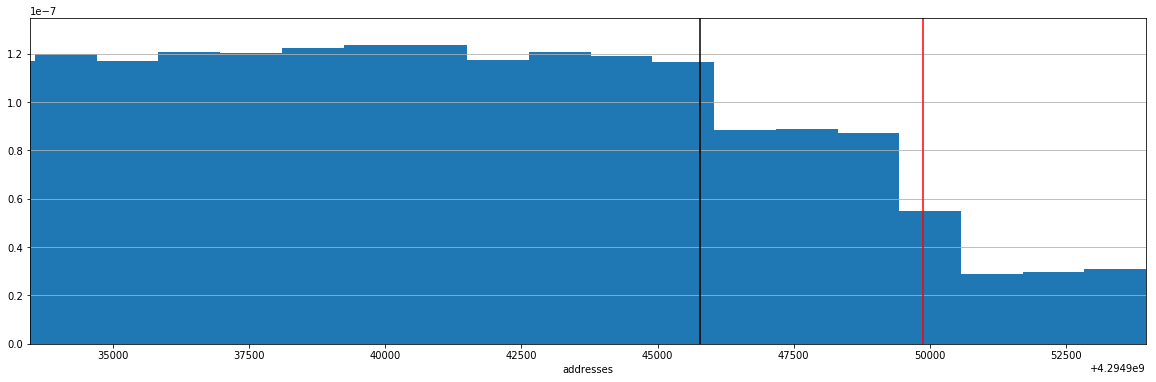

In [5]:
plt.figure(figsize=(20,6))
counts, bins, patches = plt.hist(addresses, bins=int(n_total/0x800), density=True)
plt.xlabel('addresses')
plt.axes().set_xlim(left=max - 0x5000, right=max)
plt.axvline(max - 0x2000, color='k')
plt.axvline(max - 0x1000, color='r')
#plt.xaxis.set_major_formatter(FormatStrFormatter('%08x'))
plt.axes().yaxis.grid()
print('bins={}'.format(len(bins)))

It's possible to notice a little step at the right of the distribution, if we expand the histogram doing a "zoom" we can observe something interesting

bins=257


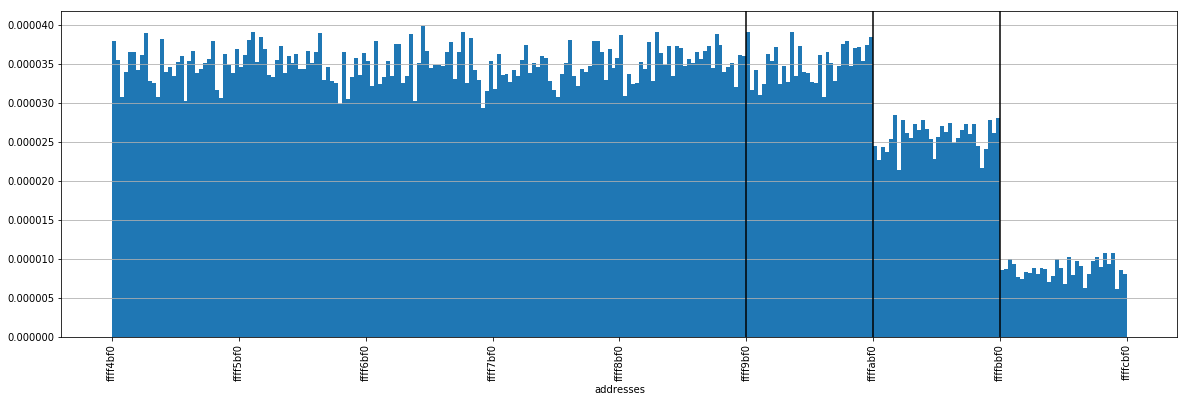

In [6]:
# http://synesthesiam.com/posts/matplotlib-and-numpy-double-trouble.html
plt.figure(figsize=(20,6))
limit = 0x8000
bins_size = 0x80
counts, bins, patches = plt.hist(addresses, range=(max - limit, max), bins=int(limit/bins_size), density=True)
plt.axvline(max - 0x3000, color='k')
plt.axvline(max - 0x2000, color='k')
plt.axvline(max - 0x1000, color='k')
plt.xlabel('addresses')
plt.xticks(np.arange(max - limit, max + 0x1000, 0x1000), rotation='vertical')
plt.axes().yaxis.grid()
plt.axes().xaxis.set_major_formatter(FormatStrFormatter('%08x'))
print('bins={}'.format(len(bins)))

it seems that there are three regions on the right $ \hbox{stack_top} - 0x1000 < x < \hbox{stack_top}$

<Figure size 1440x432 with 0 Axes>

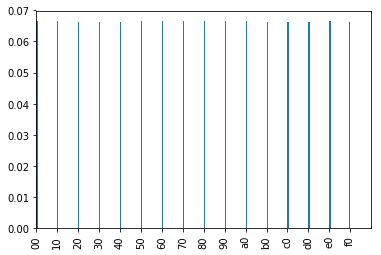

#: 15184852 min: 0x00000000 max: 0x000000f0 delta: 0x000000f0


<Figure size 1440x432 with 0 Axes>

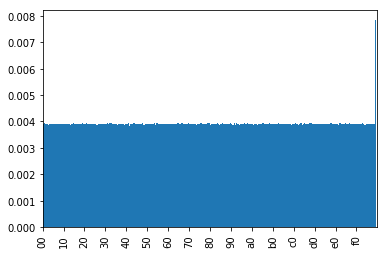

#: 15184852 min: 0x00000000 max: 0x000000ff delta: 0x000000ff


<Figure size 1440x432 with 0 Axes>

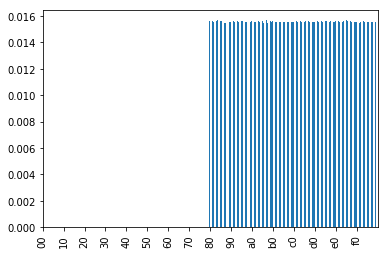

#: 15184852 min: 0x0000007f max: 0x000000ff delta: 0x00000080


<Figure size 1440x432 with 0 Axes>

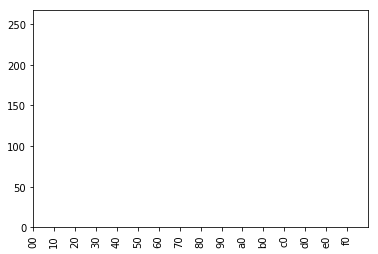

#: 15184852 min: 0x000000ff max: 0x000000ff delta: 0x00000000


In [7]:
plot_statistics(first_byte_statistics)
plot_statistics(second_byte_statistics)
plot_statistics(third_byte_statistics)
plot_statistics(fourth_byte_statistics)